In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm

In [24]:
df= pd.read_excel(r'C:\Users\Dell\Downloads\Sample_Superstore.xlsx', sheet_name='Fact_Orders')

In [25]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [27]:
df['order-ship'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days

In [28]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order-ship
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


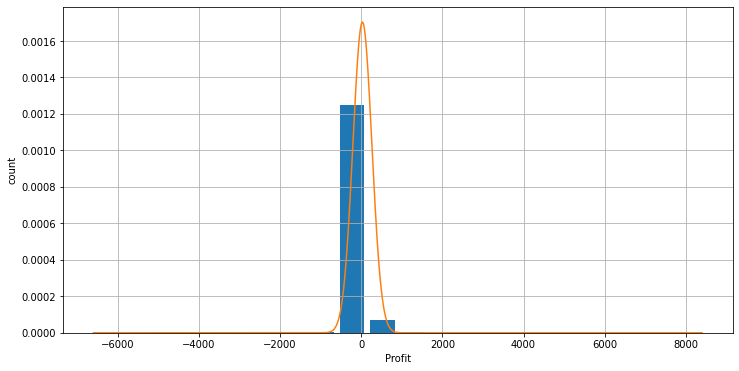

In [29]:
plt.figure(figsize=(12,6))
plt.hist(df['Profit'], bins=20, rwidth= 0.8, density=True)
plt.xlabel('Profit')
plt.ylabel('count')

rng= np.arange(df['Profit'].min(), df['Profit'].max(),0.1)
plt.plot(rng, norm.pdf(rng, df['Profit'].mean(), df['Profit'].std()));
plt.grid(True)

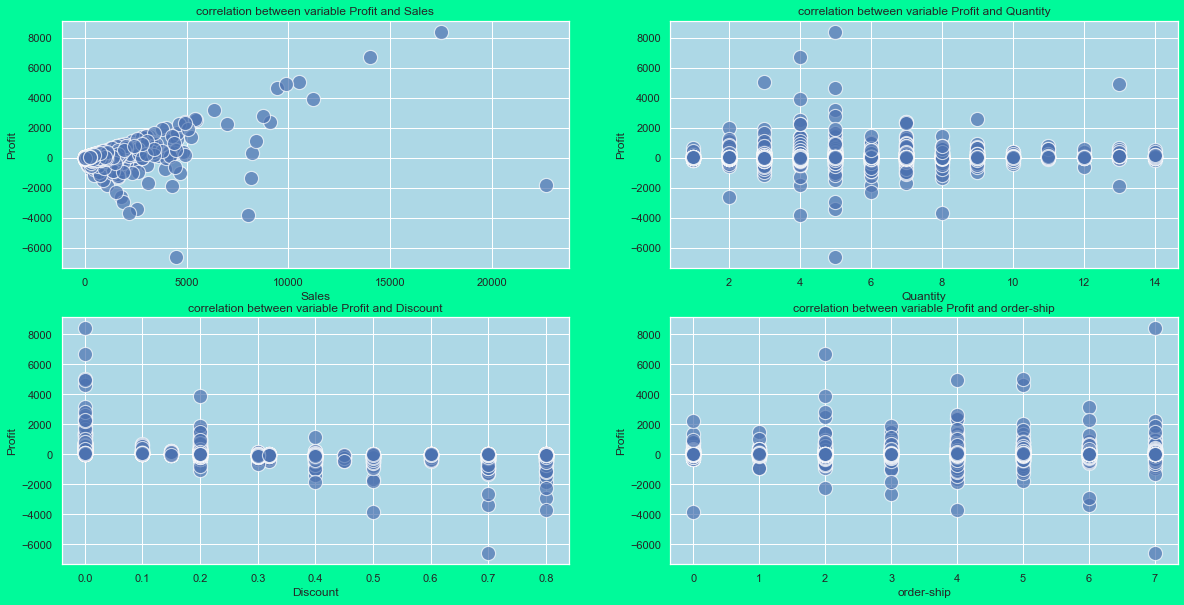

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.set(rc={'axes.facecolor':'lightblue','figure.facecolor':'mediumspringgreen'})
sns.scatterplot(ax=axes[0, 0], data=df, x='Sales', y='Profit', s=200, alpha=0.7)
axes[0,0].set_title('correlation between variable Profit and Sales')
sns.scatterplot(ax=axes[0, 1], data=df, x='Quantity', y='Profit',s=200, alpha=0.7)
axes[0,1].set_title('correlation between variable Profit and Quantity')
sns.scatterplot(ax=axes[1, 0], data=df, x='Discount', y='Profit',s=200, alpha=0.7)
axes[1,0].set_title('correlation between variable Profit and Discount')
sns.scatterplot(ax=axes[1, 1], data=df, x='order-ship', y='Profit',s=200, alpha=0.7)
axes[1,1].set_title('correlation between variable Profit and order-ship');

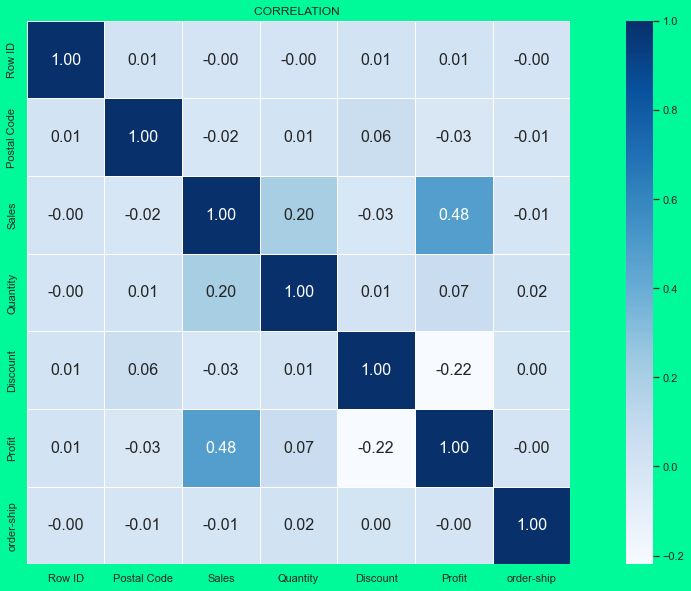

In [10]:
plt.figure(figsize=(20,10))
plt.title('CORRELATION ')
corr1= df.corr()
sns.heatmap(corr1, square= True, annot= True, fmt= '.2f', annot_kws= {'size':16}, cmap='Blues', linecolor='white', linewidths=0.5);

In [11]:
import plotly.express as px
fig = px.scatter(df, x = 'Sales', y ='Profit',
                    size ='Quantity' , color = 'Segment')
fig.show()

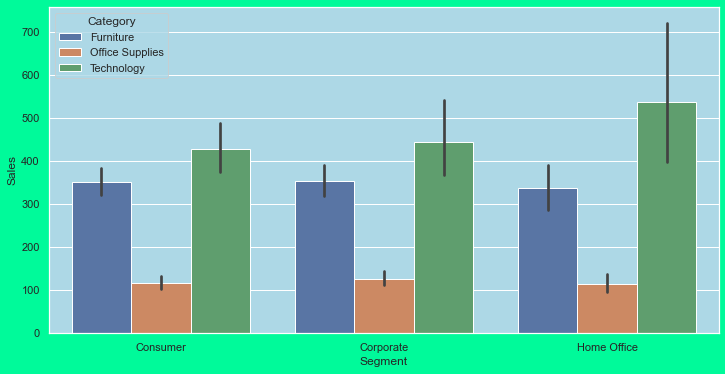

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Segment',y='Sales',hue='Category');

In [7]:
# xóa những dong có id
data= df.drop(['Row ID','Order ID','Order Date','Ship Date','Customer ID','Product ID','Customer Name','City', 'Postal Code','Country','Product Name','Sub-Category','State'], axis= 'columns')

In [14]:
data.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit,order-ship
0,Second Class,Consumer,South,Furniture,261.9600,2,0.00,41.9136,3
1,Second Class,Consumer,South,Furniture,731.9400,3,0.00,219.5820,3
2,Second Class,Corporate,West,Office Supplies,14.6200,2,0.00,6.8714,4
3,Standard Class,Consumer,South,Furniture,957.5775,5,0.45,-383.0310,7
4,Standard Class,Consumer,South,Office Supplies,22.3680,2,0.20,2.5164,7


# Data processing

In [8]:
df1= data.drop(['Profit'], axis='columns')
x= df1.values
y= data['Profit'].values

In [9]:
df1

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,order-ship
0,Second Class,Consumer,South,Furniture,261.9600,2,0.00,3
1,Second Class,Consumer,South,Furniture,731.9400,3,0.00,3
2,Second Class,Corporate,West,Office Supplies,14.6200,2,0.00,4
3,Standard Class,Consumer,South,Furniture,957.5775,5,0.45,7
4,Standard Class,Consumer,South,Office Supplies,22.3680,2,0.20,7
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,South,Furniture,25.2480,3,0.20,2
9990,Standard Class,Consumer,West,Furniture,91.9600,2,0.00,5
9991,Standard Class,Consumer,West,Technology,258.5760,2,0.20,5
9992,Standard Class,Consumer,West,Office Supplies,29.6000,4,0.00,5


In [10]:
x

array([['Second Class', 'Consumer', 'South', ..., 2, 0.0, 3],
       ['Second Class', 'Consumer', 'South', ..., 3, 0.0, 3],
       ['Second Class', 'Corporate', 'West', ..., 2, 0.0, 4],
       ...,
       ['Standard Class', 'Consumer', 'West', ..., 2, 0.2, 5],
       ['Standard Class', 'Consumer', 'West', ..., 4, 0.0, 5],
       ['Second Class', 'Consumer', 'West', ..., 2, 0.0, 5]], dtype=object)

In [9]:
from sklearn.preprocessing import MinMaxScaler
mn= MinMaxScaler(feature_range=(0,1))
x[:, 4:]= mn.fit_transform(x[:,4:])

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ohe= make_column_transformer((OneHotEncoder(),[0,1,2,3]), remainder= 'passthrough')
x= ohe.fit_transform(x)

# Split training and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=0)

In [12]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import  SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS, mean_absolute_error, mean_squared_error, r2_score
models= [LinearRegression(),RandomForestRegressor(n_estimators=5),GradientBoostingRegressor(learning_rate=0.03, random_state=0),
         AdaBoostRegressor(learning_rate=0.05),
         DecisionTreeRegressor(random_state=0, max_depth=3),
         SVR(kernel='linear', gamma='scale',degree=4),KNeighborsRegressor(n_neighbors=2), 
         xgb.XGBRegressor(learning_rate=0.01), lgb.LGBMRegressor(learning_rate=0.05)];
CV = 10 
entries = []
i=0
for model in models:
    mae_l = []
    mse_l = []
    score= []
    for j in range(CV):
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        score_model= model.score(X_test,y_test) 
        r2_models= r2_score(y_test,y_pred)
        score.append(score_model)
        mae_l.append(mae)
        mse_l.append(mse)
    entries.append([model_name, np.array(mae_l).mean(),np.array(mse_l).mean(),np.array(score).mean()])
    i += 1
model_df = pd.DataFrame(entries, columns=['model_name', 'Mean MAE','Mean MSE','score'])
model_df.sort_values(by=['score'], ascending=False)

,model_name,Mean MAE,Mean MSE,score
2,GradientBoostingRegressor,42.055103,22704.075360,0.739266
1,RandomForestRegressor,31.860745,24837.281927,0.714768
7,XGBRegressor,39.721166,36718.765172,0.578321
8,LGBMRegressor,31.265748,38140.541844,0.561994
3,AdaBoostRegressor,64.336430,38680.810729,0.555789
4,DecisionTreeRegressor,62.417141,39300.716705,0.548670
0,LinearRegression,61.988581,56313.767646,0.353292
6,KNeighborsRegressor,63.576718,74250.230698,0.147310
5,SVR,62.708889,85802.987948,0.014638


# Use GridSearchCV find the best parameters for model.

In [58]:
#GridSearchCV for RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameter_RandomForestRegressor= {
    'n_estimators': range(1,20)
    }

grid_RandomForestRegressor= GridSearchCV(RandomForestRegressor(random_state=0), parameter_RandomForestRegressor, cv=5,verbose=2, refit=True )
grid_RandomForestRegressor.fit(X_train, y_train)
print('Best parameter_RandomForestRegressor: ',grid_RandomForestRegressor.best_params_ )

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=3; total time=   0.0s
[CV] END .....................................n_

In [81]:
# GridSearchCV for DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
parameter_DecisionTreeRegressor= {
    'max_depth': range(1,50)
}
grid_DecisionTreeRegressor= GridSearchCV(DecisionTreeRegressor(), parameter_DecisionTreeRegressor, cv=5,verbose=2, refit=True )
grid_DecisionTreeRegressor.fit(X_train, y_train)
print('Best parameter_DecisionTreeRegressor: ',grid_DecisionTreeRegressor.best_params_ )

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ......................................

In [63]:
# GridSearchCV for KNeighborsRegressor model
from sklearn.neighbors import KNeighborsRegressor
parameter_KNeighborsRegressor= {
    'n_neighbors': range(1,50)
}
grid_NeighborsRegressor= GridSearchCV(KNeighborsRegressor(), parameter_KNeighborsRegressor, cv=5,verbose=2, refit=True )
grid_NeighborsRegressor.fit(X_train, y_train)
print('Best parameter_KNeighborsRegressor: ', grid_NeighborsRegressor.best_params_ )

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

In [212]:
# GridSearchCV for GradientBoostingRegressor model
from sklearn.ensemble import GradientBoostingRegressor
parameter_GradientBoostingRegressor= {
    'learning_rate': [0.03,0.05],
    'max_depth' : [5,10,12,15,20],
    'n_estimators' :[10,15,20,100,1000]
}
grid_GradientBoostingRegressor= GridSearchCV(GradientBoostingRegressor(), parameter_GradientBoostingRegressor, cv=5,verbose=2, refit=True )
grid_GradientBoostingRegressor.fit(X_train, y_train)
print('Best parameter_GradientBoostingRegressor: ', grid_GradientBoostingRegressor.best_params_ )

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.03, max_depth=5, n_estimators=20; total time=   0.1s
[CV] END ...learning_rate=0.03, max_depth=5, n_

In [232]:
# GridSearchCV for XGBRegressor model
import xgboost as xgb
parameter_XGBRegressor= {
    'max_depth': [5,7,10,20],
    'n_estimators' :[20,100,1000],
    'subsample': [0.5,0.7,0.8]
}
grid_XGBRegressor= GridSearchCV(xgb.XGBRegressor(), parameter_XGBRegressor, cv=5,verbose=2, refit=True )
grid_XGBRegressor.fit(X_train, y_train)
print('Best parameter_XGBRegressor: ', grid_XGBRegressor.best_params_ )

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ........max_depth=5, n_estimators=20, subsample=0.5; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.5; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.5; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.5; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.5; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.7; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.7; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.7; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.7; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.7; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, subsample=0.8; total time=   0.0s
[CV] END ........max_depth=5, n_estimators=20, 

In [237]:
# GridSearchCV for SVR model
from sklearn.svm import SVR
parameter_SVR= {
    'kernel': [ 'poly','linear'],
    'degree': [3,4],
    'gamma': ['scale','auto']
    }
grid_SVR= GridSearchCV(SVR(), parameter_SVR, cv=5,verbose=2, refit=True )
grid_SVR.fit(X_train, y_train)
print('Best parameter_SVR: ', grid_SVR.best_params_ )

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................degree=3, gamma=scale, kernel=poly; total time=   1.5s
[CV] END .................degree=3, gamma=scale, kernel=poly; total time=   1.6s
[CV] END .................degree=3, gamma=scale, kernel=poly; total time=   1.6s
[CV] END .................degree=3, gamma=scale, kernel=poly; total time=   1.5s
[CV] END .................degree=3, gamma=scale, kernel=poly; total time=   1.5s
[CV] END ...............degree=3, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ...............degree=3, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ...............degree=3, gamma=scale, kernel=linear; total time=   1.4s
[CV] END ...............degree=3, gamma=scale, kernel=linear; total time=   1.4s
[CV] END ...............degree=3, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................degree=3, gamma=auto, kernel=poly; total time=   1.5s
[CV] END ..................degree=3, gamma=auto, 

In [47]:
# GridSearchCV for LGBMRegressor model
import lightgbm as lgb
parameter_LGBMRegressor= {
    'max_depth': [ 5,10,20],
    'n_estimators': [100,1000,2000],
    }
grid_LGBMRegressor= GridSearchCV(lgb.LGBMRegressor(), parameter_LGBMRegressor, cv=5,verbose=2, refit=True )
grid_LGBMRegressor.fit(X_train, y_train)
print('Best parameter_LGBMRegressor: ', grid_LGBMRegressor.best_params_ )

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END .....................max_depth=5, n_estimators=1000; total time=   0.3s
[CV] END .....................max_depth=5, n_estimators=1000; total time=   0.4s
[CV] END .....................max_depth=5, n_estimators=1000; total time=   0.3s
[CV] END .....................max_depth=5, n_estimators=1000; total time=   0.3s
[CV] END .....................max_depth=5, n_estimators=1000; total time=   0.3s
[CV] END .....................max_depth=5, n_estimators=2000; total time=   0.6s
[CV] END .....................max_depth=5, n_esti

In [19]:
# GridSearchCV for AdaBoostRegressor model
from sklearn.ensemble import AdaBoostRegressor
parameter_AdaBoostRegressor= {
    'learning_rate':[0.05,0.08],
    'loss': ['linear', 'square','exponential'],
    'n_estimators': [50,100,1000],
    'base_estimator': [DecisionTreeRegressor(max_depth=5),DecisionTreeRegressor(max_depth=10),DecisionTreeRegressor(max_depth=20)]
    }
grid_AdaBoostRegressor= GridSearchCV(AdaBoostRegressor(), parameter_AdaBoostRegressor, cv=5,verbose=2, refit=True )
grid_AdaBoostRegressor.fit(X_train, y_train)
print('Best parameter_AdaBoostRegressor: ', grid_AdaBoostRegressor.best_params_ )

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.05, loss=linear, n_estimators=50; total time=   0.8s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.05, loss=linear, n_estimators=50; total time=   0.9s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.05, loss=linear, n_estimators=50; total time=   0.7s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.05, loss=linear, n_estimators=50; total time=   0.8s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.05, loss=linear, n_estimators=50; total time=   0.7s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.05, loss=linear, n_estimators=100; total time=   1.5s
[CV] END base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.05, loss=linear, n_estimators=100; total time=   1.6s
[CV] END base_estimator=DecisionT

In [44]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import  SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb                                             
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS, mean_absolute_error, mean_squared_error
models= [LinearRegression(),RandomForestRegressor(n_estimators=12, random_state=0),GradientBoostingRegressor(learning_rate=0.05, max_depth=5,n_estimators=1000),
         DecisionTreeRegressor(random_state=0, max_depth=7),
         SVR(kernel='linear', gamma='scale',degree=4),KNeighborsRegressor(n_neighbors=7), 
         xgb.XGBRegressor(learning_rate=0.08,max_depth=5,n_estimators=100, subsample=0.8), lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,n_estimators=100),
         AdaBoostRegressor(learning_rate=0.05, base_estimator= DecisionTreeRegressor(max_depth=5),loss='linear', n_estimators=1000)] ;
CV = 10 
entries = []
i=0                                             
for model in models:
    mae_l = []
    mse_l = []
    score= []
    for j in range(CV):
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        score_model= model.score(X_test,y_test) 
        score.append(score_model)
        mae_l.append(mae)
        mse_l.append(mse)
    entries.append([model_name, np.array(mae_l).mean(),np.array(mse_l).mean(),np.array(score).mean()])
    i += 1
model_df = pd.DataFrame(entries, columns=['model_name', 'Mean MAE','Mean MSE','score'])
model_df.sort_values(by=['score'], ascending=False)

,model_name,Mean MAE,Mean MSE,score
3,DecisionTreeRegressor,31.757690,15691.547961,0.819798
1,RandomForestRegressor,29.515135,16050.841598,0.815672
2,GradientBoostingRegressor,27.960924,16784.440532,0.807247
6,XGBRegressor,30.765939,18365.652737,0.789089
8,AdaBoostRegressor,39.143028,20260.350185,0.767330
7,LGBMRegressor,31.371738,36028.629261,0.586247
0,LinearRegression,61.988581,56313.767646,0.353292
5,KNeighborsRegressor,65.207939,77361.845216,0.111576
4,SVR,62.708889,85802.987948,0.014638


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree=3)
x_poly= poly_reg.fit_transform(X_train)
poly_reg.fit(x_poly,y_train)
lin_reg= LinearRegression()
lin_reg.fit(x_poly,y_train)
x_test_poly= poly_reg.fit_transform(X_test)
lin_score= lin_reg.score(x_test_poly, y_test)
y_pred_poly= lin_reg.predict(x_test_poly)
lin_mse= mean_squared_error(y_test,y_pred_poly)
lin_mae= mean_absolute_error(y_test,y_pred_poly)
print('MSE_POLY: ',lin_mse)
print('MAE_POLY: ',lin_mae)
print('SCORE POLY: ',lin_score)

MSE_POLY:  74468.56782104826
MAE_POLY:  39.7468176088044
SCORE POLY:  0.14480231310700176


In [46]:
from sklearn.ensemble import BaggingRegressor
bg= BaggingRegressor(n_estimators=1000, max_samples=7995,random_state=0)
bg.fit(X_train,y_train)
score= bg.score(X_test,y_test)
y_pred= bg.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  21799.12495604431
MAE:  28.954374305427592
SCORRE:  0.7496586575493227


In [47]:
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor_LinearRegression = BaggingRegressor(LinearRegression(), random_state=0)
model_BaggingRegressor_LinearRegression.fit(X_train, y_train)
score = model.score(X_test,y_test)
y_pred= model_BaggingRegressor_LinearRegression.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  55427.37282885362
MAE:  61.39688457431841
SCORRE:  0.7582074315048242


In [48]:
model = BaggingRegressor(RandomForestRegressor(n_estimators=12), random_state=0)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  26937.589566463266
MAE:  30.30115787917453
SCORRE:  0.6906484848336101


In [49]:
model = BaggingRegressor(DecisionTreeRegressor(max_depth=20), random_state=0)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  15818.370687695025
MAE:  29.43079687400924
SCORRE:  0.8183416920942959


In [50]:
cv_df= {
 'model_name':['PolynomialFeatures(degree=3)','BaggingRegressor','BaggingRegressor(LinearRegression)',
 'BaggingRegressor(RandomForestRegressor)','BaggingRegressor(DecisionTreeRegressor)'],
 'Mean MAE':[39.707817458729366, 28.954374305427592, 61.37902788738119, 29.84634918392471,29.43079687400924],   
 'Mean MSE':[73621.49870775724, 21799.12495604431, 55438.6410992574, 27310.201803991837, 15818.370687695025],
 'score':[0.15453006224360089, 0.7496586575493227,0.014684260264121507,0.6863694026252856,0.8183416920942959]
}
df2= pd.DataFrame(cv_df)
df2

,model_name,Mean MAE,Mean MSE,score
0,PolynomialFeatures(degree=3),39.707817,73621.498708,0.154530
1,BaggingRegressor,28.954374,21799.124956,0.749659
2,BaggingRegressor(LinearRegression),61.379028,55438.641099,0.014684
3,BaggingRegressor(RandomForestRegressor),29.846349,27310.201804,0.686369
4,BaggingRegressor(DecisionTreeRegressor),29.430797,15818.370688,0.818342


In [51]:
total= pd.concat([model_df, df2],ignore_index=True)
total.sort_values(by=['score'], ascending=False)

,model_name,Mean MAE,Mean MSE,score
3,DecisionTreeRegressor,31.757690,15691.547961,0.819798
13,BaggingRegressor(DecisionTreeRegressor),29.430797,15818.370688,0.818342
1,RandomForestRegressor,29.515135,16050.841598,0.815672
2,GradientBoostingRegressor,27.960924,16784.440532,0.807247
6,XGBRegressor,30.765939,18365.652737,0.789089
8,AdaBoostRegressor,39.143028,20260.350185,0.767330
10,BaggingRegressor,28.954374,21799.124956,0.749659
12,BaggingRegressor(RandomForestRegressor),29.846349,27310.201804,0.686369
7,LGBMRegressor,31.371738,36028.629261,0.586247
0,LinearRegression,61.988581,56313.767646,0.353292
